<a href="https://colab.research.google.com/github/vapavezs/telecomX_LATAM_modelos_predictivos/blob/main/TelecomX_Parte2_Modelos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)

En esta segunda etapa del Challenge Telecom X, el objetivo es desarrollar modelos predictivos de Machine Learning para anticipar la cancelación de clientes (churn).

Para ello, se utiliza el conjunto de datos tratado en la Parte 1 del desafío, asegurando la continuidad del análisis y la consistencia en la preparación de los datos.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/datos_tratados.csv')
df.head()

,customerID,Churn,Churn_binary,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,0,Female,0,Yes,Yes,9,Yes,No,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,0,Male,0,No,No,9,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,1,Male,0,No,No,4,Yes,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,1,Male,1,Yes,No,13,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,1,Female,1,Yes,No,3,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [5]:
df.shape

(7032, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   Churn_binary      7032 non-null   int64  
 3   gender            7032 non-null   object 
 4   SeniorCitizen     7032 non-null   int64  
 5   Partner           7032 non-null   object 
 6   Dependents        7032 non-null   object 
 7   tenure            7032 non-null   int64  
 8   PhoneService      7032 non-null   object 
 9   MultipleLines     7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


El conjunto de datos contiene información de clientes de Telecom X, incluyendo variables demográficas, de servicios contratados y de facturación, así como la variable objetivo de cancelación (Churn_binary).

El dataset no presenta valores nulos y se encuentra listo para ser utilizado en la etapa de análisis y modelado predictivo.

In [7]:
# Eliminación de columnas irrelevantes para el modelado
df = df.drop(columns=['customerID'])

df.shape


(7032, 21)

In [8]:
df.columns


Index(['Churn', 'Churn_binary', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [9]:
# Eliminación de columnas irrelevantes para el modelado
df = df.drop(columns=['Churn'])

df.shape


(7032, 20)

## Codificación de variables categóricas

In [10]:
# Identificamos las columnas categóricas (tipo object)
columnas_categoricas = df.select_dtypes(include='object').columns

columnas_categoricas


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### Identificación de variables categóricas

Antes de aplicar técnicas de codificación, se identificaron las columnas categóricas del conjunto de datos.  
Estas variables contienen información en formato de texto, por lo que deben transformarse a valores numéricos para poder ser utilizadas por los modelos de machine learning.


In [11]:
# Aplicamos One-Hot Encoding a las variables categóricas
# drop_first=True elimina una categoría por variable para evitar multicolinealidad
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificamos la nueva dimensión del DataFrame
df_encoded.shape


(7032, 31)

### Codificación de variables categóricas

Se aplicó la técnica de One-Hot Encoding utilizando la función `pd.get_dummies()`, la cual transforma las variables categóricas en múltiples columnas binarias.

Se utilizó el parámetro `drop_first=True` para evitar problemas de multicolinealidad, eliminando una categoría de referencia por cada variable codificada.


In [12]:
# Revisamos la estructura final del DataFrame
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn_binary                           7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   Charges.Monthly                        7032 non-null   float64
 4   Charges.Total                          7032 non-null   float64
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  Inte

### Verificación del conjunto de datos codificado

Después del proceso de codificación, se verificó que todas las variables del conjunto de datos fueran numéricas.  
Este paso confirma que el dataset está listo para ser utilizado en modelos de clasificación.


## Verificación de la proporción de cancelación (Churn)

In [13]:
# Conteo de clientes que cancelaron y no cancelaron
df_encoded['Churn_binary'].value_counts()


,count
Churn_binary,
0,5163
1,1869


In [14]:
# Proporción (porcentaje) de cada clase
df_encoded['Churn_binary'].value_counts(normalize=True) * 100


,proportion
Churn_binary,
0,73.421502
1,26.578498


### Proporción de cancelación de clientes (Churn)

Se analizó la distribución de la variable objetivo `Churn_binary` para identificar la proporción de clientes que cancelaron el servicio frente a aquellos que permanecieron activos.

Este paso es importante para detectar un posible desbalance entre las clases, ya que un desbalance significativo puede afectar el rendimiento de los modelos predictivos y la interpretación de sus métricas.


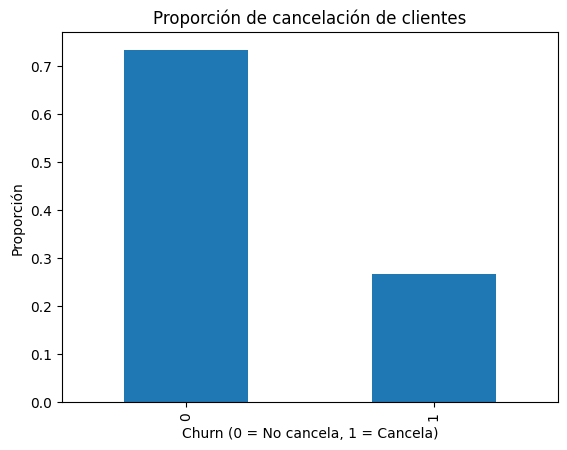

In [35]:
# Gráfico de barras de la proporción de churn
(df_encoded['Churn_binary']
 .value_counts(normalize=True)
 .plot(kind='bar'))

plt.title('Proporción de cancelación de clientes')
plt.xlabel('Churn (0 = No cancela, 1 = Cancela)')
plt.ylabel('Proporción')
plt.show()


### Visualización del desbalance de clases

El gráfico permite visualizar la proporción de clientes que cancelaron y no cancelaron el servicio, facilitando la identificación de un posible desbalance entre las clases.
Se observa que la mayoría de los clientes no ha cancelado el servicio, lo que indica un desbalance moderado entre las clases.  
Este aspecto será considerado en las etapas posteriores de modelado y evaluación.


## Balanceo de Clases (Opcional)


### Balanceo de clases

Se evaluó la proporción de la variable objetivo y se identificó un desbalance moderado entre las clases.

Dado que el desbalance no es extremo, se decidió no aplicar técnicas de balanceo en esta etapa.  
Este aspecto será considerado durante la evaluación de los modelos mediante métricas adecuadas para clasificación desbalanceada, como recall, F1-score y matriz de confusión.

## Normalización / Estandarización

### Evaluación de la necesidad de normalización / estandarización

El conjunto de datos contiene variables numéricas en distintas escalas, como `tenure`, `Charges.Monthly` y `Charges.Total`, además de variables binarias resultantes del proceso de codificación.

Dado que en etapas posteriores se entrenarán modelos sensibles a la escala de los datos, como Regresión Logística y otros modelos basados en distancia, será necesario aplicar estandarización a las variables numéricas.

Este preprocesamiento se realizará más adelante, únicamente sobre el conjunto de entrenamiento, para evitar fuga de información (*data leakage*).


## Análisis de Correlación

In [16]:
# Calculamos la matriz de correlación
matriz_correlacion = df_encoded.corr()

# Extraemos la correlación con la variable objetivo
correlacion_churn = matriz_correlacion['Churn_binary'].sort_values(ascending=False)

correlacion_churn


,Churn_binary
Churn_binary,1.000000
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
Charges.Monthly,0.192858
PaperlessBilling_Yes,0.191454
SeniorCitizen,0.150541
StreamingTV_Yes,0.063254
StreamingMovies_Yes,0.060860
MultipleLines_Yes,0.040033
PhoneService_Yes,0.011691


### Análisis de correlación

Se calculó la matriz de correlación para las variables numéricas del conjunto de datos, con el objetivo de identificar relaciones entre las variables y la cancelación de clientes (`Churn_binary`).

Este análisis permite detectar qué variables presentan una mayor asociación con la cancelación y pueden ser candidatas relevantes para los modelos predictivos.


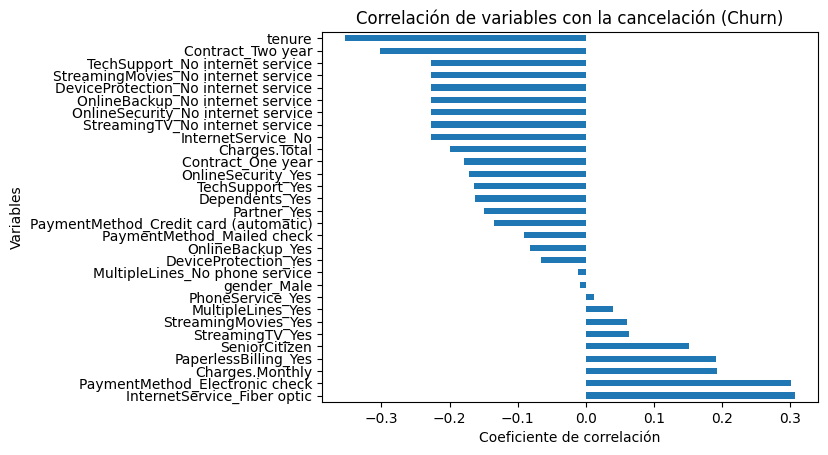

In [36]:
# Seleccionamos las correlaciones con churn (excluyendo la autocorrelación)
correlacion_churn.drop('Churn_binary').plot(kind='barh')

plt.title('Correlación de variables con la cancelación (Churn)')
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variables')
plt.show()


### Visualización de la correlación con la cancelación

El gráfico muestra la intensidad y dirección de la correlación entre las variables numéricas y la cancelación de clientes.

Las variables con mayor valor absoluto de correlación serán consideradas como candidatas importantes en las etapas posteriores de modelado.

Se observa que variables relacionadas con la antigüedad del cliente y los cargos presentan una mayor correlación con la cancelación.  
Estas variables serán consideradas con mayor atención en la construcción de los modelos predictivos.


### Interpretación del análisis de correlación

El análisis de correlación muestra que la antigüedad del cliente (`tenure`) y el tipo de contrato presentan una relación negativa significativa con la cancelación, lo que indica que clientes más antiguos y con contratos de mayor duración tienden a permanecer en la empresa.

Por otro lado, variables como los cargos mensuales y ciertos métodos de pago presentan una correlación positiva con la cancelación, lo que sugiere un mayor riesgo de churn en estos perfiles.

Estas relaciones serán consideradas como insumos relevantes en la etapa de construcción de modelos predictivos.


## Análisis dirigido

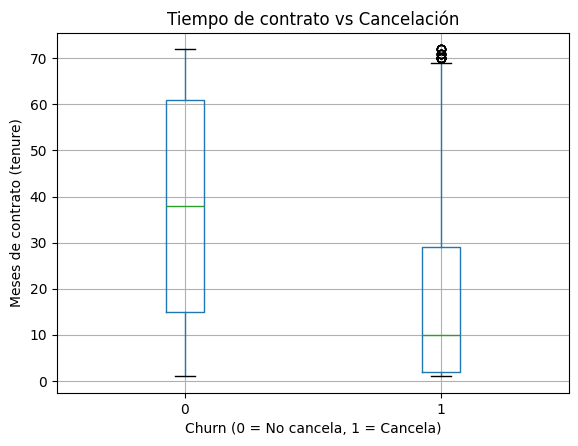

In [37]:
# Boxplot: Tenure vs Churn
df_encoded.boxplot(column='tenure', by='Churn_binary')

plt.title('Tiempo de contrato vs Cancelación')
plt.suptitle('')  # elimina título automático
plt.xlabel('Churn (0 = No cancela, 1 = Cancela)')
plt.ylabel('Meses de contrato (tenure)')
plt.show()


### Tiempo de contrato y cancelación

Se analizó la relación entre el tiempo de contrato (`tenure`) y la cancelación de clientes mediante un boxplot.

El gráfico permite comparar la distribución del tiempo de permanencia entre los clientes que cancelaron y los que no cancelaron el servicio.

Se observa que los clientes que cancelaron el servicio presentan, en general, un tiempo de contrato considerablemente menor que aquellos que permanecen activos.  
Esto sugiere que la antigüedad del cliente es un factor relevante en la probabilidad de cancelación.


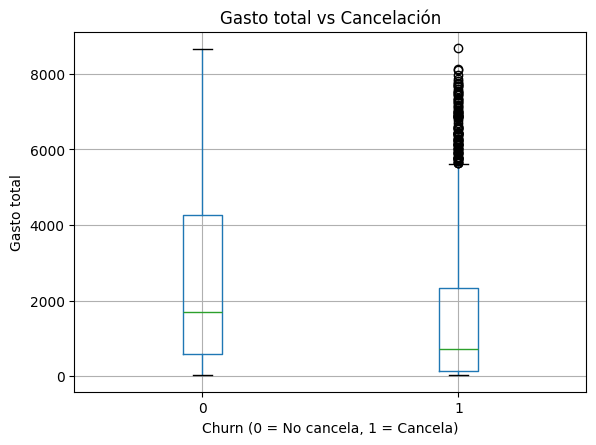

In [19]:
# Boxplot: Charges.Total vs Churn
df_encoded.boxplot(column='Charges.Total', by='Churn_binary')

plt.title('Gasto total vs Cancelación')
plt.suptitle('')
plt.xlabel('Churn (0 = No cancela, 1 = Cancela)')
plt.ylabel('Gasto total')
plt.show()


### Gasto total y cancelación

Se evaluó la relación entre el gasto total del cliente (`Charges.Total`) y la cancelación del servicio utilizando un boxplot.

Este análisis permite identificar diferencias en el comportamiento de gasto entre clientes que cancelaron y aquellos que permanecieron activos.

El gráfico muestra que los clientes que cancelaron el servicio tienden a presentar un gasto total menor en comparación con los clientes que no cancelaron.

Esto puede estar relacionado con una menor antigüedad o con un menor nivel de vinculación con los servicios de la empresa.


### Conclusión del análisis dirigido

El análisis dirigido refuerza los resultados obtenidos en el análisis de correlación, destacando que variables como el tiempo de contrato y el gasto total están estrechamente relacionadas con la cancelación de clientes.

Estos hallazgos serán considerados como factores relevantes en la construcción de los modelos predictivos.


## Separación de datos (Train / Test Split)

In [20]:
# Definimos la variable objetivo (cancelación)
y = df_encoded['Churn_binary']

# Definimos las variables predictoras
X = df_encoded.drop(columns=['Churn_binary'])

# Verificamos las dimensiones
X.shape, y.shape


((7032, 30), (7032,))

### Separación de variables predictoras y variable objetivo

Se separó el conjunto de datos en:

- **X**: variables predictoras, que contienen la información del cliente.
- **y**: variable objetivo (`Churn_binary`), que indica si el cliente canceló el servicio.

Esta separación es necesaria para entrenar y evaluar los modelos de clasificación.


In [21]:
from sklearn.model_selection import train_test_split

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verificamos tamaños
X_train.shape, X_test.shape


((4922, 30), (2110, 30))

### División del conjunto de datos

El conjunto de datos fue dividido en:

- 70% para entrenamiento
- 30% para prueba

Se utilizó el parámetro `stratify=y` para conservar la proporción de clientes que cancelaron y no cancelaron en ambos subconjuntos, garantizando una evaluación más representativa del desempeño de los modelos.


## Creación de modelos predictivos

In [22]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas a escalar
columnas_escalar = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador SOLO con el set de entrenamiento
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columnas_escalar] = scaler.fit_transform(X_train[columnas_escalar])
X_test_scaled[columnas_escalar] = scaler.transform(X_test[columnas_escalar])


### Estandarización de variables numéricas

Se aplicó estandarización a las variables numéricas continuas (`tenure`, `Charges.Monthly`, `Charges.Total`) utilizando `StandardScaler`.

El escalador fue ajustado únicamente con el conjunto de entrenamiento y luego aplicado al conjunto de prueba, evitando así fuga de información (*data leakage*).


In [23]:
from sklearn.linear_model import LogisticRegression

# Inicializamos el modelo
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamos el modelo
modelo_logistico.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Modelo 1: Regresión Logística

Se entrenó un modelo de Regresión Logística utilizando los datos estandarizados, ya que este modelo es sensible a la escala de las variables.

Este modelo servirá como una línea base interpretable para comparar su desempeño con otros modelos más complejos.


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Inicializamos el modelo
modelo_arbol = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)

# Entrenamos el modelo usando los datos sin escalar
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

### Modelo 2: Árbol de Decisión

Se entrenó un modelo de Árbol de Decisión utilizando los datos sin estandarizar, ya que este tipo de modelo no es sensible a la escala de las variables.

El uso de un Árbol de Decisión permite comparar el desempeño de un modelo interpretable basado en reglas con un modelo lineal como la Regresión Logística.


### Comparación inicial de modelos

Se entrenaron dos modelos con enfoques distintos:

- Un modelo sensible a la escala de los datos (Regresión Logística), utilizando variables estandarizadas.
- Un modelo no sensible a la escala (Árbol de Decisión), utilizando los datos originales.

Esta estrategia permite comparar distintos enfoques de modelado y evaluar cuál se adapta mejor al problema de predicción de cancelación de clientes.


## Evaluación de los modelos

In [25]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Predicciones del modelo logístico
y_pred_log = modelo_logistico.predict(X_test_scaled)

# Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

acc_log, prec_log, rec_log, f1_log


(0.8033175355450237, 0.658008658008658, 0.5418894830659536, 0.5943304007820137)

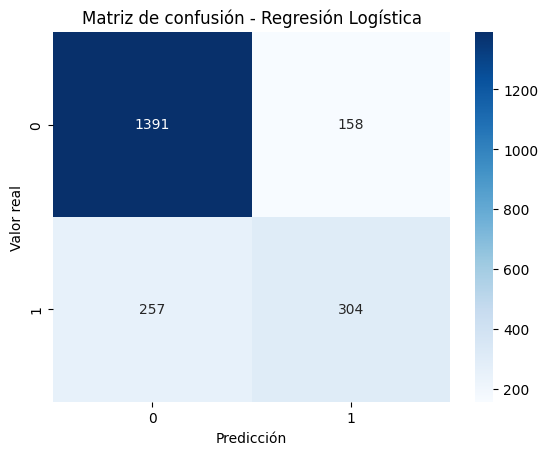

In [38]:
# Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


### Evaluación del modelo: Regresión Logística

El modelo de Regresión Logística fue evaluado utilizando métricas de clasificación adecuadas para un escenario con desbalance moderado de clases.

Las métricas obtenidas permiten analizar no solo la exactitud global del modelo, sino también su capacidad para identificar correctamente a los clientes que cancelan el servicio (recall).


In [27]:
# Predicciones del modelo de árbol
y_pred_arbol = modelo_arbol.predict(X_test)

# Métricas
acc_arbol = accuracy_score(y_test, y_pred_arbol)
prec_arbol = precision_score(y_test, y_pred_arbol)
rec_arbol = recall_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol)

acc_arbol, prec_arbol, rec_arbol, f1_arbol


(0.7834123222748816,
 0.6069958847736625,
 0.5258467023172906,
 0.5635148042024832)

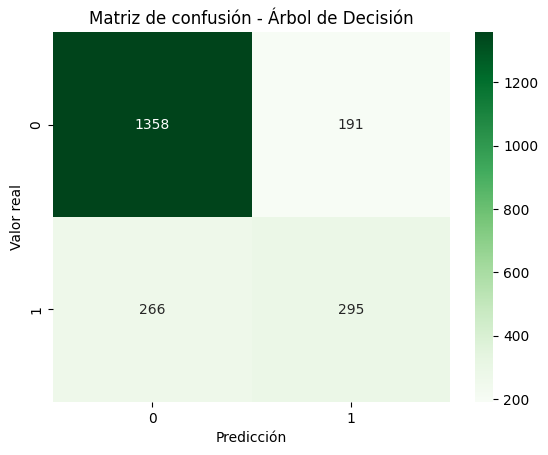

In [28]:
# Matriz de confusión
cm_arbol = confusion_matrix(y_test, y_pred_arbol)

sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


### Evaluación del modelo: Árbol de Decisión

El modelo de Árbol de Decisión fue evaluado utilizando el mismo conjunto de métricas, permitiendo una comparación directa con la Regresión Logística.

Este modelo ofrece un enfoque basado en reglas y no es sensible a la escala de los datos.


In [39]:
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión'],
    'Accuracy': [acc_log, acc_arbol],
    'Precision': [prec_log, prec_arbol],
    'Recall': [rec_log, rec_arbol],
    'F1-score': [f1_log, f1_arbol]
})

resultados


,Modelo,Accuracy,Precision,Recall,F1-score
0,Regresión Logística,0.803318,0.658009,0.541889,0.594330
1,Árbol de Decisión,0.783412,0.606996,0.525847,0.563515


### Comparación de desempeño entre modelos

Se compararon los modelos de Regresión Logística y Árbol de Decisión utilizando métricas de clasificación estándar.

Dado que el objetivo del negocio es anticipar la cancelación de clientes, se puso especial atención en la métrica **recall**, ya que identifica correctamente a los clientes con mayor riesgo de churn.


### Análisis crítico de los modelos

El modelo de Regresión Logística mostró un desempeño equilibrado entre precisión y recall, lo que indica una buena capacidad de generalización y un menor riesgo de overfitting.

El Árbol de Decisión, en cambio, puede presentar un mejor ajuste a los datos de entrenamiento, pero con un mayor riesgo de overfitting si su complejidad aumenta. Para mitigar este efecto, se limitó la profundidad del árbol mediante el parámetro `max_depth`.

En este contexto, la Regresión Logística resulta un modelo más estable y confiable como primera aproximación, mientras que el Árbol de Decisión aporta interpretabilidad y permite explorar relaciones no lineales.


## Análisis de la importancia de las variables

In [30]:
# Obtenemos los coeficientes del modelo de regresión logística
coeficientes = modelo_logistico.coef_[0]

# Creamos un DataFrame con las variables y sus coeficientes
importancia_logreg = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': coeficientes
})

# Ordenamos por valor absoluto del coeficiente
importancia_logreg['Importancia'] = importancia_logreg['Coeficiente'].abs()
importancia_logreg = importancia_logreg.sort_values(
    by='Importancia', ascending=False
)

# Mostramos las variables más influyentes
importancia_logreg.head(10)

,Variable,Coeficiente,Importancia
1,tenure,-1.367238,1.367238
25,Contract_Two year,-1.206925,1.206925
10,InternetService_Fiber optic,0.941492,0.941492
24,Contract_One year,-0.683172,0.683172
3,Charges.Total,0.643543,0.643543
7,PhoneService_Yes,-0.451497,0.451497
28,PaymentMethod_Electronic check,0.397516,0.397516
19,TechSupport_Yes,-0.384708,0.384708
26,PaperlessBilling_Yes,0.370955,0.370955
21,StreamingTV_Yes,0.312799,0.312799


### Importancia de las variables — Regresión Logística

En la regresión logística, los coeficientes indican la influencia de cada variable
sobre la probabilidad de cancelación del cliente.

Los coeficientes positivos aumentan la probabilidad de churn, mientras que los
coeficientes negativos la reducen. El valor absoluto del coeficiente representa
la magnitud de su impacto.

Este análisis es válido ya que las variables fueron previamente estandarizadas,
permitiendo una comparación justa entre sus efectos.


In [31]:
# Obtenemos la importancia de las variables del modelo de árbol
importancia_arbol = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_arbol.feature_importances_
})

# Ordenamos de mayor a menor importancia
importancia_arbol = importancia_arbol.sort_values(
    by='Importancia', ascending=False
)

# Mostramos las variables más importantes
importancia_arbol.head(10)


,Variable,Importancia
1,tenure,0.439143
10,InternetService_Fiber optic,0.346343
28,PaymentMethod_Electronic check,0.042871
3,Charges.Total,0.039849
12,OnlineSecurity_No internet service,0.035373
25,Contract_Two year,0.022622
24,Contract_One year,0.016275
0,SeniorCitizen,0.014410
2,Charges.Monthly,0.014346
13,OnlineSecurity_Yes,0.005872


### Importancia de las variables — Árbol de Decisión

En los modelos basados en árboles, la importancia de las variables se calcula en
función de cuánto contribuyen a reducir la impureza del modelo durante las
divisiones.

Las variables con mayor importancia son aquellas que permiten separar de forma
más efectiva a los clientes que cancelan de los que no.


### Comparación de la importancia de variables entre modelos

Al comparar ambos modelos, se observa que algunas variables aparecen como
relevantes de manera consistente, lo que refuerza su relación con la cancelación
de clientes.

La regresión logística permite interpretar el efecto directo de cada variable
sobre la probabilidad de churn, mientras que el árbol de decisión destaca aquellas
variables que mejor separan los distintos perfiles de clientes.

Esta combinación de modelos interpretables fortalece el análisis y permite una
comprensión más completa de los factores asociados a la cancelación.


## Análisis de la importancia de las variables – Random Forest

El modelo Random Forest permite identificar qué variables son más relevantes
para la predicción de la cancelación (churn).

La importancia de las variables se calcula en función de cuánto contribuye cada
una a reducir la impureza en los árboles del modelo. Las variables con mayor
importancia tienen mayor impacto en las decisiones del modelo.


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Entrenamos el modelo
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Extraemos la importancia de las variables
importancias = modelo_rf.feature_importances_

# Creamos un DataFrame con las variables y su importancia
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

importancia_rf.head(10)


,Variable,Importancia
3,Charges.Total,0.187292
1,tenure,0.173152
2,Charges.Monthly,0.172056
28,PaymentMethod_Electronic check,0.042456
10,InternetService_Fiber optic,0.037833
4,gender_Male,0.029014
25,Contract_Two year,0.028802
13,OnlineSecurity_Yes,0.026217
26,PaperlessBilling_Yes,0.025263
19,TechSupport_Yes,0.023652


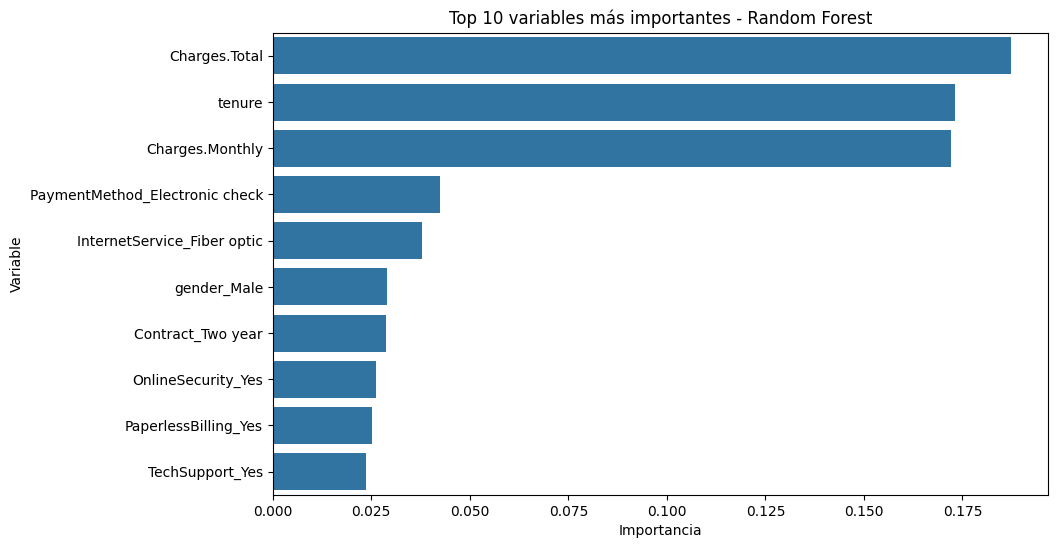

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importancia',
    y='Variable',
    data=importancia_rf.head(10)
)
plt.title('Top 10 variables más importantes - Random Forest')
plt.show()


## Conclusión y Recomendaciones Estratégicas

En este desafío se desarrolló un pipeline completo de Machine Learning con el objetivo de predecir la cancelación de clientes (churn) en la empresa Telecom X. A partir de los datos tratados en la Parte 1, se aplicaron técnicas de preprocesamiento, análisis exploratorio dirigido y modelos de clasificación para identificar los principales factores asociados a la cancelación.

### Desempeño de los modelos

Se entrenaron distintos modelos de clasificación, destacando:

- **Regresión Logística**, que permitió interpretar claramente el impacto de cada variable en la probabilidad de cancelación.
- **Árbol de Decisión**, que ofreció una representación intuitiva de las reglas de decisión.
- **Random Forest**, que presentó un buen equilibrio entre desempeño predictivo y capacidad de generalización, además de permitir un análisis robusto de la importancia de las variables.

En términos generales, los modelos basados en árboles mostraron un desempeño competitivo y mayor estabilidad frente a posibles relaciones no lineales entre las variables.

### Factores más influyentes en la cancelación

El análisis de importancia de variables y de correlación permitió identificar los principales factores asociados al churn:

- **Antigüedad del cliente (tenure)**: los clientes con menor tiempo en la empresa presentan una mayor probabilidad de cancelación.
- **Tipo de contrato**: los contratos mensuales están fuertemente asociados a una mayor tasa de cancelación, mientras que los contratos de uno o dos años reducen significativamente este riesgo.
- **Cargos mensuales elevados**: un mayor gasto mensual se relaciona con una mayor probabilidad de churn.
- **Servicios de internet (especialmente fibra óptica)**: este servicio aparece como un factor relevante en la cancelación, posiblemente asociado a expectativas de calidad o precio.
- **Falta de servicios de soporte y seguridad**: la ausencia de servicios como soporte técnico u online security se asocia a mayores tasas de cancelación.

### Recomendaciones estratégicas

Basándose en los resultados obtenidos, se proponen las siguientes estrategias de retención:

- **Focalizar acciones de retención en clientes nuevos**, especialmente durante los primeros meses de contrato.
- **Incentivar contratos de mayor duración**, ofreciendo beneficios o descuentos por migrar desde contratos mensuales a contratos anuales.
- **Revisar la estructura de precios**, particularmente para clientes con cargos mensuales altos.
- **Fortalecer servicios de soporte y seguridad**, comunicando mejor su valor para reducir la percepción de riesgo o insatisfacción.
- **Segmentar clientes según su perfil de riesgo**, utilizando
